In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc0 = QuantumCircuit(q,c)
qc1 = QuantumCircuit(q,c)

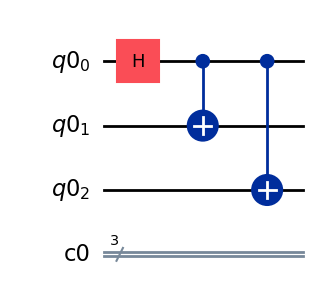

In [2]:
qc0.h(q[0])
qc0.cx(q[0],q[1])
qc0.cx(q[0],q[2])
qc0.draw('mpl')

In [3]:
from qiskit.quantum_info import Statevector

In [4]:
psi0 = Statevector(qc0)
psi0.draw('latex')

<IPython.core.display.Latex object>

In [5]:
from math import sqrt
ampl =[sqrt(2)/2,0,0,0,0,0,0,sqrt(2)/2]

In [6]:
qc1.initialize(ampl,[q[0],q[1],q[2]])

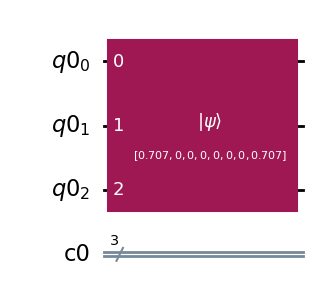

In [7]:
qc1.draw('mpl')

In [8]:
qc0.measure(q[0],c[0])
qc0.measure(q[1],c[1])
qc0.measure(q[2],c[2])
qc1.measure(q[0],c[0])
qc1.measure(q[1],c[1])
qc1.measure(q[2],c[2])

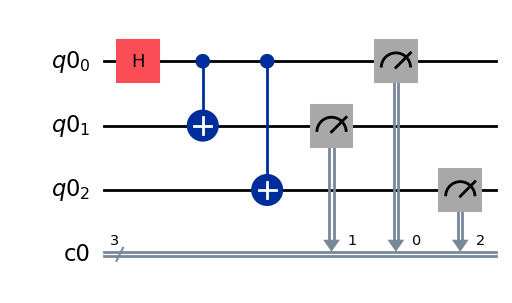

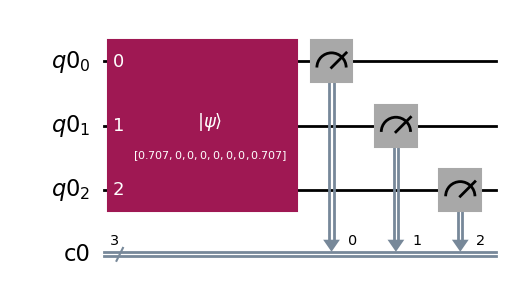

In [9]:
display(qc0.draw('mpl'),qc1.draw('mpl'))

In [10]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
backend = QasmSimulator()
qc_list = [qc0,qc1]
qc_compiled = transpile(qc_list,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'000': 522, '111': 502}, {'000': 507, '111': 517}]


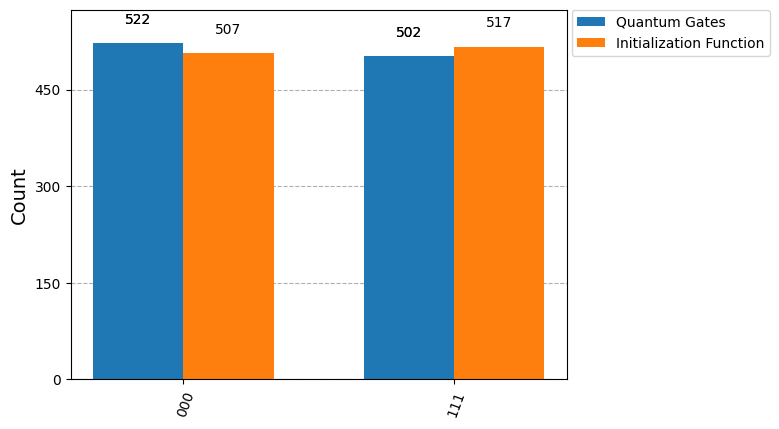

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,legend=['Quantum Gates','Initialization Function'])

In [16]:
q2 = QuantumRegister(2)
qcx = QuantumCircuit(q2)

In [17]:
from qiskit.quantum_info import Statevector

In [18]:
psi1 = Statevector(qcx)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [19]:
from qiskit.quantum_info import Operator

In [20]:
id2 = Operator([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [23]:
qcx.unitary(id2,[q2[0],q2[1]],label='Id2')

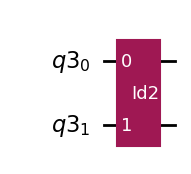

In [25]:
qcx.draw('mpl')

In [26]:
psi2 = Statevector(qcx)
psi2.draw('latex')

<IPython.core.display.Latex object>